<a href="https://colab.research.google.com/github/Bersk9/www/blob/master/Assignment_2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk
!pip install gensim
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 3.4MB/s 
     |████████████████████████████████| 552kB 22.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=d6c2041f48409d597b2ffd489ab5decc6e3410e02b8a0d26eeecf4cb263765c8
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=daa5a8c3ca429936686b86b24c021e843a8192d9de0c6770e40366aab33ae902
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [11]:
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
#Dowloand the dataset
nltk.download("brown")
nltk.download("punkt")
en_stop = nltk.corpus.stopwords.words('english')
from nltk.corpus import brown as corpus
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
import string

# English stopwords defined by the NLTK package.
en_stop = nltk.corpus.stopwords.words('english')

# Ignore noises that might affect our result.
en_stop = ['``',"``","/",",.",".,",";","--",":",")","(",'"','&',"'",'),',',"','-','.,','.,"','.-',"?",">","<","!","#","$","%","+","=","?","@","[","]","`","''","'","-"]                  \
         +["[0-9]+"]                                                      \
         +["said","say","u","v","mln","ct","net","dlrs","tonne","pct","shr","nil","company","lt","share","year","billion","price"]          \
         +en_stop

In [81]:
### Pre-processing Method

from nltk.corpus import wordnet as wn # import for lemmatize

def preprocess_word(word, stopwordset):
    
    #1.convert words to lowercase (e.g., Python =>python)
    word=word.lower()

    pattern3 = '[0-9]+' 
    word = re.sub(pattern3, '', word)
    
    #2.remove "," and "."
    if word in [",",".",""]:
        return None
    
    #3.remove stopwords  (e.g., the => (None)) 
    if word in stopwordset:
        return None
    
    #4.lemmatize  (e.g., cooked=>cook)
    lemma = wn.morphy(word)
    if lemma is None:
        return word

    # lemmatized words could be in the stopwords set
    elif lemma in stopwordset: 
        return None
    else:
        return lemma


def preprocess_document(document):
    document=[preprocess_word(w, en_stop) for w in document]
    document=[w for w in document if w is not None]
    return document

def preprocess_documents(documents):
    return [preprocess_document(document) for document in documents]

In [77]:
docs=[corpus.words(fileid) for fileid in corpus.fileids()]

print(docs[:5])
print("num of docs:", len(docs))

# before
print(docs[0][:25]) 

# after
print(preprocess_documents(docs)[0][:25])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...], ['Austin', ',', 'Texas', '--', 'Committee', 'approval', ...], ['Several', 'defendants', 'in', 'the', 'Summerdale', ...], ['Oslo', 'The', 'most', 'positive', 'element', 'to', ...], ['East', 'Providence', 'should', 'organize', 'its', ...]]
num of docs: 500
['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']
['fulton', 'county', 'grand', 'jury', 'friday', 'investigation', "atlanta's", 'recent', 'primary', 'election', 'produce', 'evidence', 'irregularity', 'take', 'place', 'jury', 'term-end', 'presentment', 'city', 'executive', 'committee', 'over-all', 'charge', 'election', 'deserve']


Reshape for LDA Model

In [66]:
import gensim
from gensim import corpora

In [82]:
pre_docs=preprocess_documents(docs)
# build the dictionary
dictionary = corpora.Dictionary(preprocess_documents(docs))
# construct the 
corpus_ = [dictionary.doc2bow(doc) for doc in preprocess_documents(docs)]

In [83]:
# token2id is the attribute which indicates the mapping between words and dictionary ID

print(dictionary.token2id)

# corpus_ contains words of each document with a list (ID, appear frequency)
# note that there is not the appearing order in the documents, but the order of the dictionary
print(corpus_[0][:10]) 

{'accept': 0, 'accord': 1, 'achieve': 2, 'act': 3, 'action': 4, 'add': 5, 'additional': 6, 'adjournment': 7, 'adjustment': 8, 'administration': 9, 'administrator': 10, 'afternoon': 11, 'age': 12, 'agree': 13, 'agriculture': 14, 'aid': 15, 'airport': 16, 'aj': 17, 'ala.': 18, 'allen': 19, 'allot': 20, 'allow': 21, 'allowance': 22, 'alpharetta': 23, 'also': 24, 'alternative': 25, 'ambiguous': 26, 'amendment': 27, 'amicable': 28, 'among': 29, 'announce': 30, 'anonymous': 31, 'apparently': 32, 'appoint': 33, 'appointment': 34, 'appraiser': 35, 'approve': 36, 'area': 37, 'arm': 38, 'aside': 39, 'ask': 40, 'asking': 41, 'assistance': 42, 'assistant': 43, 'association': 44, 'atlanta': 45, "atlanta's": 46, 'attend': 47, 'attorney': 48, 'audience': 49, 'aug.': 50, 'authorities': 51, 'authority': 52, 'automobile': 53, 'available': 54, 'awarding': 55, 'b.': 56, 'back': 57, 'ballot': 58, 'bar': 59, 'barber': 60, 'battle': 61, 'become': 62, 'begin': 63, 'belief': 64, 'bellwood': 65, 'berry': 66, 'b

In [69]:
# before
print([w.lower() for w in corpus.sents(corpus.fileids()[0])[0]])

# after
print(dictionary.doc2bow([w.lower() for w in corpus.sents(corpus.fileids()[0])[0]]))

['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', "atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']
[(47, 1), (128, 1), (175, 1), (193, 1), (226, 1), (229, 1), (252, 1), (291, 1), (306, 1), (413, 1), (433, 1), (466, 1)]


Training

In [25]:
from gensim.models import CoherenceModel

def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           num_topics=k,
                                           id2word=dictionary,
                                           alpha=a,                 # optional LDA hyperparameter alpha
                                           eta=b,                   # optional LDA hyperparameter beta
                                           #minimum_probability=0.0    # optional the lower bound of the topic/word generative probability
                                          )
    coherence_model_lda = CoherenceModel(model=lda_model, texts=pre_docs, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [45]:
import numpy as np
import tqdm
import pandas as pd
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(corpus_)
corpus_sets = [gensim.utils.ClippedCorpus(corpus_, int(num_of_docs*0.75)), 
               corpus_]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()





  0%|          | 0/540 [00:00<?, ?it/s]



  0%|          | 1/540 [00:12<1:52:52, 12.56s/it]



  0%|          | 2/540 [00:25<1:52:33, 12.55s/it]



  1%|          | 3/540 [00:38<1:54:00, 12.74s/it]



  1%|          | 4/540 [00:51<1:54:22, 12.80s/it]



  1%|          | 5/540 [01:04<1:54:18, 12.82s/it]



  1%|          | 6/540 [01:16<1:53:18, 12.73s/it]



  1%|▏         | 7/540 [01:29<1:53:00, 12.72s/it]



  1%|▏         | 8/540 [01:41<1:52:26, 12.68s/it]



  2%|▏         | 9/540 [01:54<1:52:37, 12.73s/it]



  2%|▏         | 10/540 [02:07<1:51:42, 12.65s/it]



  2%|▏         | 11/540 [02:19<1:51:22, 12.63s/it]



  2%|▏         | 12/540 [02:32<1:51:18, 12.65s/it]



  2%|▏         | 13/540 [02:45<1:51:01, 12.64s/it]



  3%|▎         | 14/540 [02:57<1:50:13, 12.57s/it]



  3%|▎         | 15/540 [03:10<1:49:49, 12.55s/it]



  3%|▎         | 16/540 [03:22<1:50:17, 12.63s/it]



  3%|▎         | 17/540 [03:35<1:50:22, 12.66s/it]



  3%|▎         | 18/540 [03:48<1:50:11, 12.6

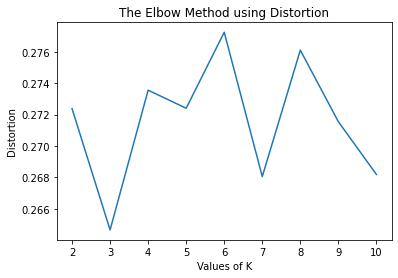

In [106]:
import matplotlib.pyplot as plt
test = pd.DataFrame(model_results)
test2 = test.loc[(test2['Validation_Set'] == "100% Corpus") & (test['Alpha'] == 0.01) & (test['Beta'] == 0.01)]
plt.plot(test2["Topics"], test2["Coherence"]) 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

In [109]:
test.loc[(test['Validation_Set'] == "100% Corpus") & (test['Topics'] == 6)].sort_values(['Coherence'], ascending=[0])

,Validation_Set,Topics,Alpha,Beta,Coherence
400,100% Corpus,6,0.61,0.01,0.282010
403,100% Corpus,6,0.61,0.91,0.281378
402,100% Corpus,6,0.61,0.61,0.281281
392,100% Corpus,6,0.01,0.61,0.281179
401,100% Corpus,6,0.61,0.31,0.279621
412,100% Corpus,6,symmetric,0.61,0.279026
405,100% Corpus,6,0.91,0.01,0.277425
390,100% Corpus,6,0.01,0.01,0.277235
408,100% Corpus,6,0.91,0.91,0.276493
399,100% Corpus,6,0.31,symmetric,0.276409


Final Model

In [110]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus=corpus_,
                                           num_topics=6,
                                           id2word=dictionary,
                                           alpha=0.61,                 # optional LDA hyperparameter alpha
                                           eta=0.01,                   # optional LDA hyperparameter beta
                                           #minimum_probability=0.0    # optional the lower bound of the topic/word generative probability
                                          )

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [111]:
topics = ldamodel.print_topics(num_words=15)
for topic in topics:
    print(topic)

(0, '0.006*"one" + 0.006*"would" + 0.005*"af" + 0.004*"time" + 0.003*"make" + 0.003*"go" + 0.003*"new" + 0.003*"take" + 0.003*"two" + 0.003*"state" + 0.003*"come" + 0.003*"first" + 0.003*"use" + 0.002*"get" + 0.002*"like"')
(1, '0.006*"one" + 0.005*"make" + 0.005*"would" + 0.003*"could" + 0.003*"new" + 0.003*"state" + 0.003*"know" + 0.003*"take" + 0.003*"first" + 0.003*"two" + 0.002*"see" + 0.002*"man" + 0.002*"even" + 0.002*"come" + 0.002*"may"')
(2, '0.007*"one" + 0.004*"would" + 0.004*"time" + 0.003*"make" + 0.003*"could" + 0.003*"may" + 0.003*"know" + 0.003*"use" + 0.003*"first" + 0.003*"come" + 0.003*"get" + 0.003*"new" + 0.002*"go" + 0.002*"like" + 0.002*"many"')
(3, '0.008*"one" + 0.005*"would" + 0.004*"make" + 0.004*"know" + 0.004*"may" + 0.003*"could" + 0.003*"like" + 0.003*"get" + 0.003*"new" + 0.003*"go" + 0.003*"state" + 0.003*"use" + 0.003*"two" + 0.003*"even" + 0.002*"come"')
(4, '0.005*"one" + 0.005*"make" + 0.004*"would" + 0.003*"new" + 0.003*"state" + 0.003*"man" + 0.0

In [112]:
for n,item in enumerate(corpus_[:10]):
    print("document ID "+str(n)+":" ,end="")
    print(ldamodel.get_document_topics(item))

document ID 0:[(0, 0.1424667), (5, 0.8483285)]
document ID 1:[(2, 0.072568946), (5, 0.9145261)]
document ID 2:[(2, 0.07593177), (3, 0.026587676), (5, 0.88532037)]
document ID 3:[(2, 0.045412425), (3, 0.63334423), (4, 0.011075865), (5, 0.29206607)]
document ID 4:[(2, 0.012091562), (5, 0.9778064)]
document ID 5:[(0, 0.028139077), (1, 0.055271074), (2, 0.2710201), (4, 0.04065869), (5, 0.5996155)]
document ID 6:[(2, 0.17210561), (3, 0.021890588), (5, 0.79641163)]
document ID 7:[(2, 0.011084679), (5, 0.9789949)]
document ID 8:[(2, 0.3549107), (5, 0.6367479)]
document ID 9:[(0, 0.7492279), (2, 0.082753696), (5, 0.15755837)]


In [91]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [113]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus_, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)